In [2]:
from obspy.core import Stream, read, UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path


In [3]:
path = '/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/'

stas = pd.read_csv(path + 'station_data.csv')
events = pd.read_csv(path + 'events_csv.csv')

2009-10-03_M6.1
BCWB
TRKB
NTTB


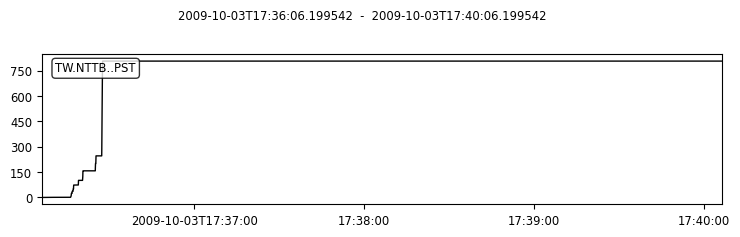

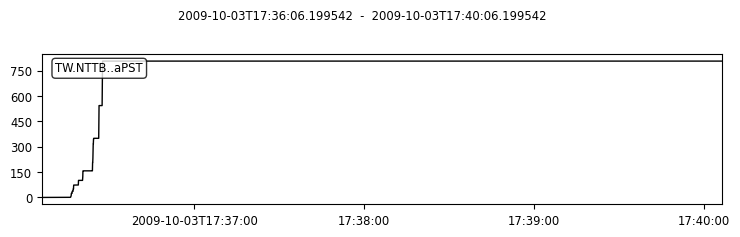

SJNB
HGSB


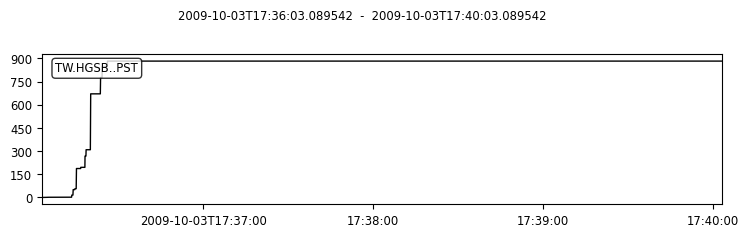

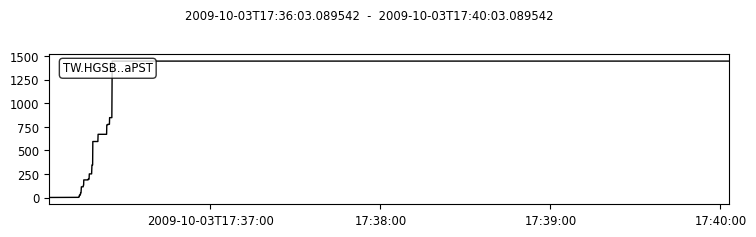

CHMB
SSNB
ZANB


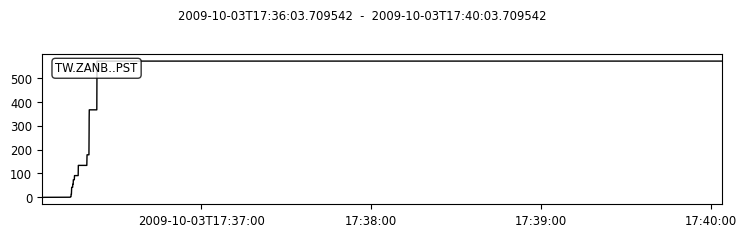

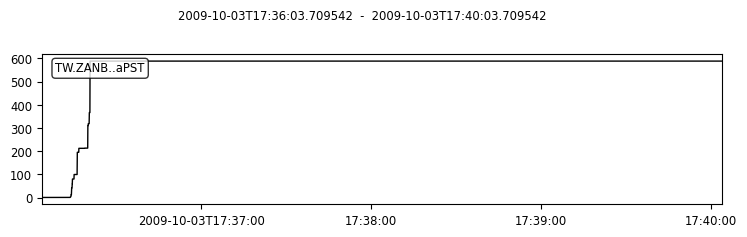

FBRB


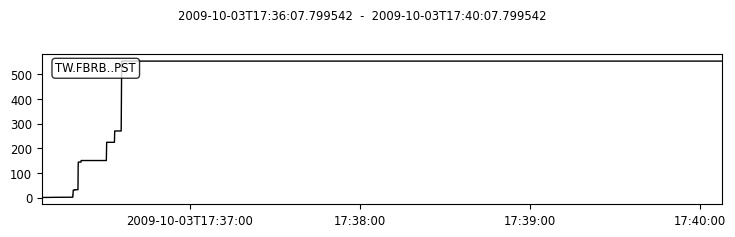

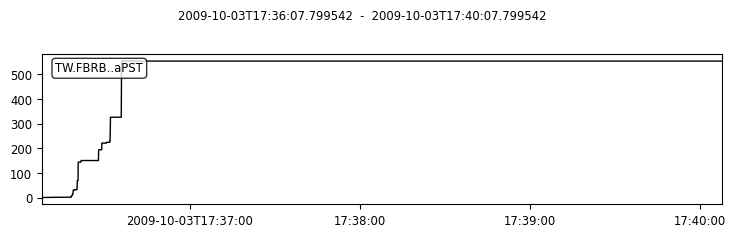

SSTB
DONB
2013-10-31_M6.3
2018-02-04_M6.1


In [4]:
for i in range(len(events)):
    
    evt_id = events['evt_id'][i]
    print(evt_id)
    origin_time = UTCDateTime(events['origin_time'][i])
    # print(origin_time)
    
    if evt_id == '2009-10-03_M6.1':
        pass
    else:
        continue

    for idx in range(len(stas)):

        sta = stas['Sta'][idx]
        print(sta)
        # plt.figure(figsize = (10,6), dpi = 300, facecolor = 'white', num = 1, clear = True)

        # Strain data
        try:
            tev = read(path + 'filtered_trimmed_EV/' + evt_id + '/' + str(sta) + '.mseed')
            atev = read(path + 'filtered_trimmed_abs_EV/' + evt_id + '/' + str(sta) + '.mseed')
        except:
            continue

        tev_data = tev[0].data # numpy array of strain values
        pst = tev.copy()

        # Loop over samples
        for k in range(0,len(tev[0].data)): #avoid starting at zero

            if k == 0:
                strain = tev[0].data[0]
                max_strain = strain

            else:
                # Grab progressively longer windows and save the biggest strain
                strain = tev[0].data[:k+1] # Has to be k+1 because slicing doesn't include last one
                max_strain = max(strain)

            # Put peak strain back into the output stream
            pst[0].data[k] = max_strain 

        pst_times = pst[0].times()
        pst_data = pst[0].data
        pst[0].stats.channel = 'PST' 
        pst.plot()
        
        # Same thing for the absolute value one
        
        atev_data = atev[0].data # numpy array of strain values
        apst = atev.copy()

        # Loop over samples
        for k in range(0,len(atev[0].data)): #avoid starting at zero

            if k == 0:
                astrain = atev[0].data[0]
                max_astrain = astrain

            else:
                # Grab progressively longer windows and save the biggest strain
                astrain = atev[0].data[:k+1] # Has to be k+1 because slicing doesn't include last one
                max_astrain = max(astrain)

            # Put peak strain back into the output stream
            apst[0].data[k] = max_astrain 

        apst_times = apst[0].times()
        apst_data = apst[0].data
        apst[0].stats.channel = 'aPST' 
        apst.plot()

        # plt.title(sta, fontsize = 18)
        # plt.plot(tev[0].times(), tev[0].data, color = 'blue')
        # plt.plot(pst_times, pst_data, color = 'red')
        # plt.semilogy()
        # plt.ylabel('Log of peak strain', fontsize = 15)
        # plt.xlabel('Time (s)', fontsize = 15)
        # plt.xlim(5,60)
        # # plt.ylim(min(pst_data[int(5*20):int(60*20)]), max(pst_data[int(5*20):int(60*20)])*1.1)
        # plt.axvline(10, color = 'gray', linestyle = '--')
        # plt.tick_params(labelsize = 13)
        # plt.show()

        # Create folder for the event
        eq_sta_save_dir = path + 'filtered_peak/' + evt_id + '/'
        # print(eq_sta_save_dir)
        if os.path.isdir(eq_sta_save_dir):
            pass
        else:
            os.makedirs(eq_sta_save_dir)

        pst.write(eq_sta_save_dir + sta + '.mseed', format = 'MSEED')
        
        # Create folder for the event
        eq_sta_save_dir = path + 'filtered_abs_peak/' + evt_id + '/'
        # print(eq_sta_save_dir)
        if os.path.isdir(eq_sta_save_dir):
            pass
        else:
            os.makedirs(eq_sta_save_dir)

        apst.write(eq_sta_save_dir + sta + '.mseed', format = 'MSEED')


2009-10-03_M6.1


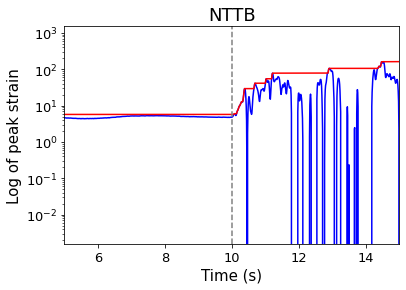

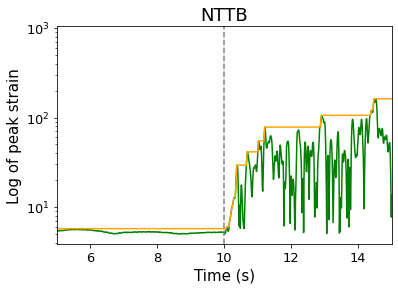

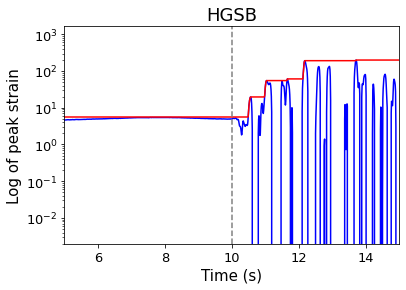

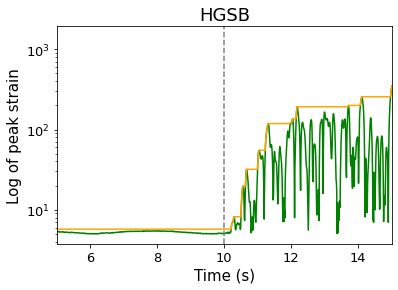

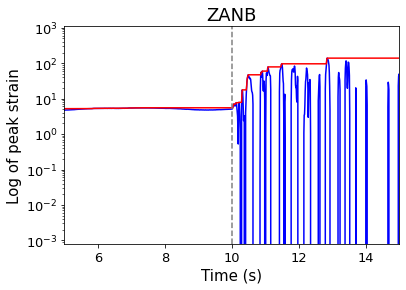

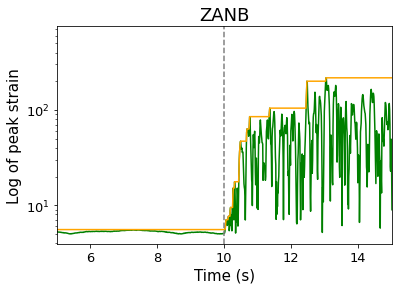

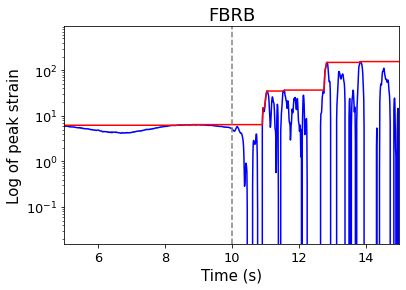

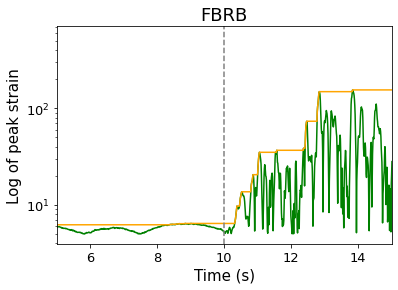

2013-10-31_M6.3


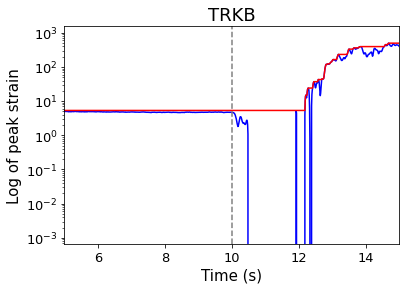

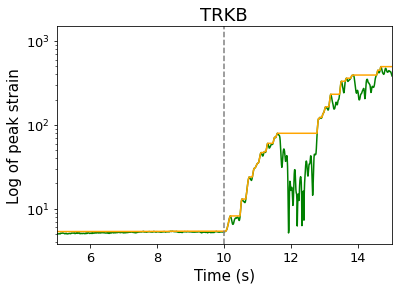

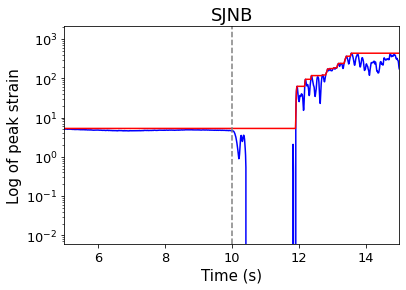

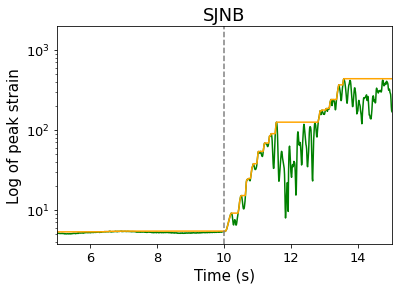

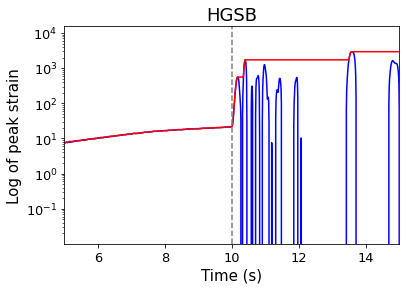

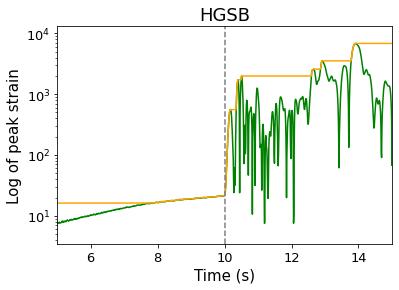

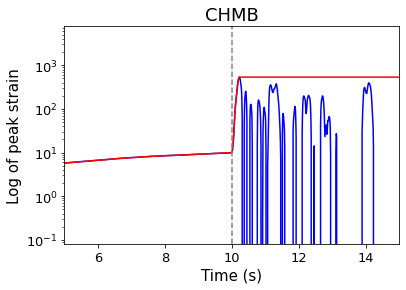

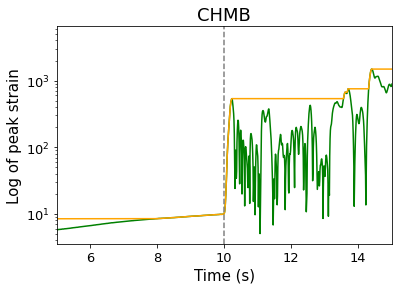

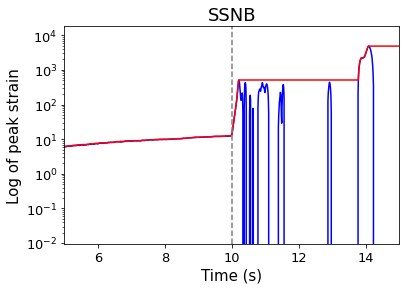

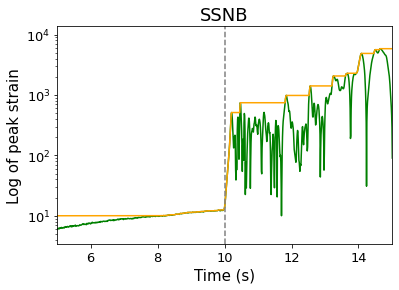

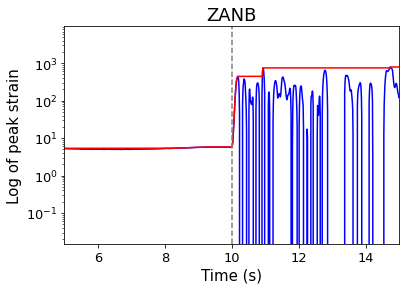

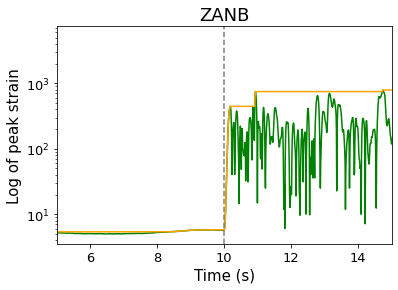

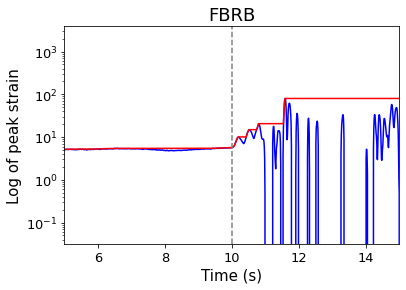

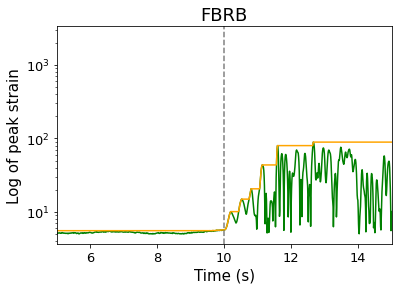

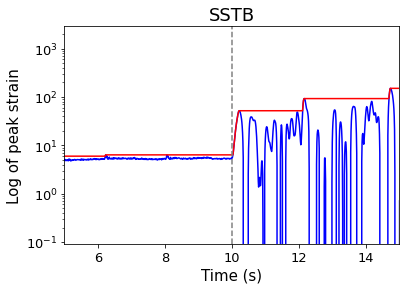

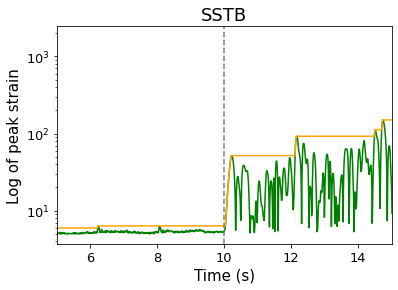

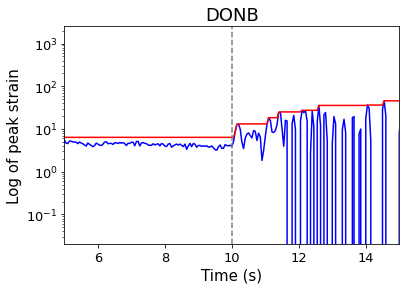

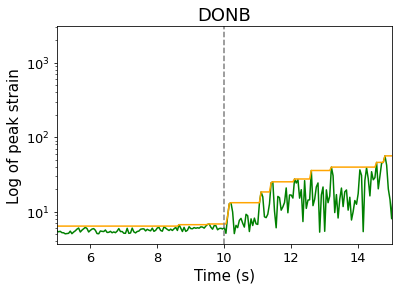

2018-02-04_M6.1


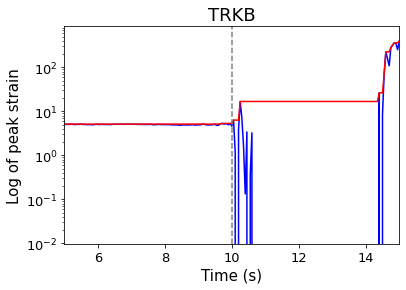

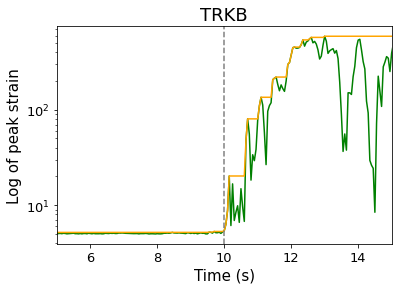

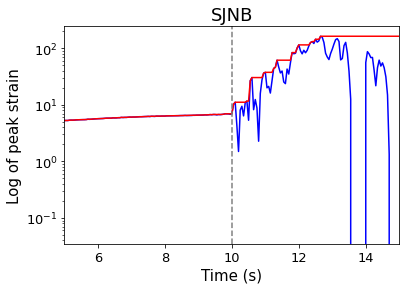

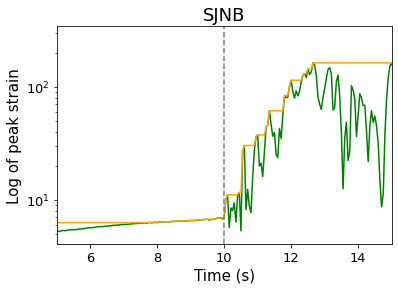

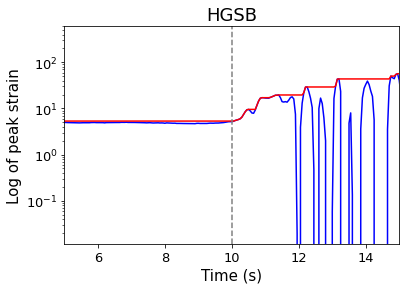

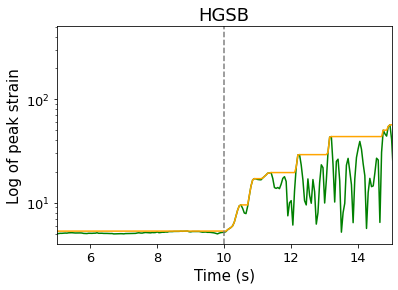

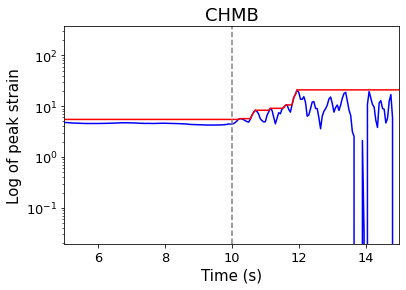

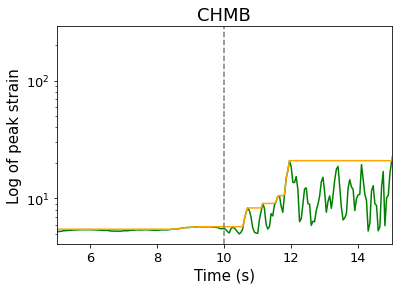

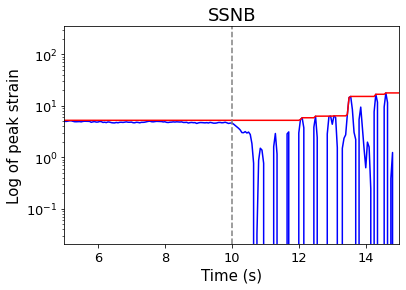

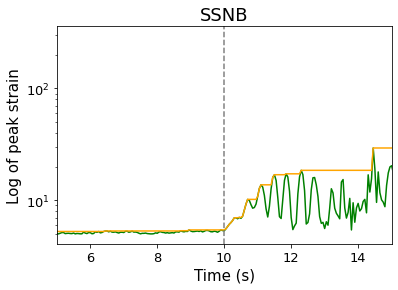

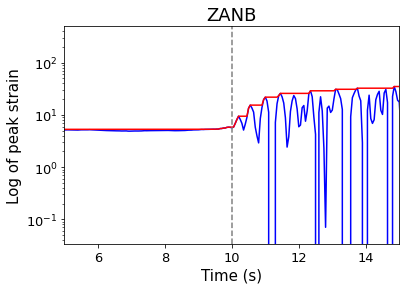

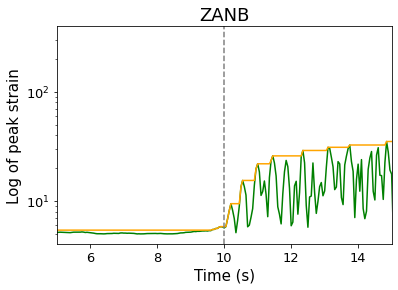

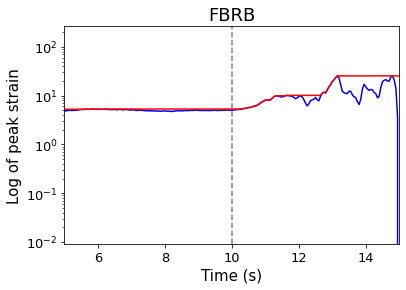

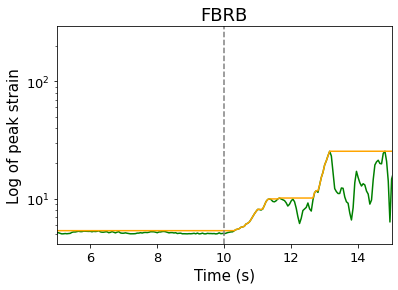

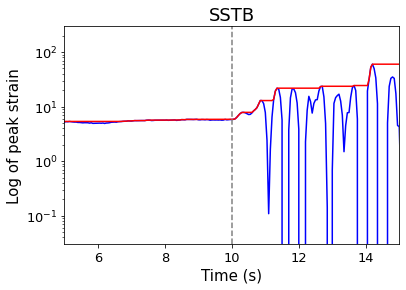

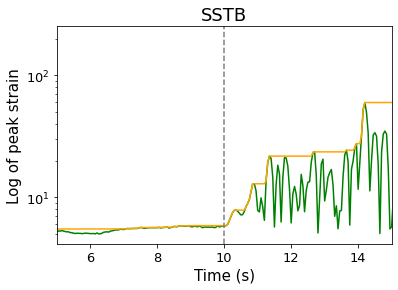

In [5]:
# Plotting peak strain

for i in range(len(events)):
    
    evt_id = events['evt_id'][i]
    print(evt_id)
    origin_time = UTCDateTime(events['origin_time'][i])
    # print(origin_time)

    for idx in range(len(stas)):

        sta = stas['Sta'][idx]
        # print(sta)
        # plt.figure(figsize = (10,6), dpi = 300, facecolor = 'white', num = 1, clear = True)

        # Strain data
        try:
            ev = read(path + 'filtered_trimmed_EV/' + evt_id + '/' + sta + '.mseed')
            pst = read(path + 'filtered_peak/' + evt_id + '/' + str(sta) + '.mseed')
            aev = read(path + 'filtered_trimmed_abs_EV/' + evt_id + '/' + sta + '.mseed')
            apst = read(path + 'filtered_abs_peak/' + evt_id + '/' + str(sta) + '.mseed')
        except:
            continue

        # pst.plot()

        # pst_times = pst[0].times()
        # pst_data = pst[0].data

        plt.title(sta, fontsize = 18)
        plt.plot(ev[0].times(), ev[0].data+5, color = 'blue')
        plt.plot(pst[0].times(), pst[0].data+5, color = 'red')
        plt.semilogy()
        plt.ylabel('Log of peak strain', fontsize = 15)
        plt.xlabel('Time (s)', fontsize = 15)
        plt.xlim(5,15)
        # plt.ylim(min(pst_data[int(5*20):int(60*20)]), max(pst_data[int(5*20):int(60*20)])*1.1)
        plt.axvline(10, color = 'gray', linestyle = '--')
        plt.tick_params(labelsize = 13)
        plt.show()
        
        plt.title(sta, fontsize = 18)
        plt.plot(aev[0].times(), aev[0].data+5, color = 'green')
        plt.plot(apst[0].times(), apst[0].data+5, color = 'orange')
        plt.semilogy()
        plt.ylabel('Log of peak strain', fontsize = 15)
        plt.xlabel('Time (s)', fontsize = 15)
        plt.xlim(5,15)
        # plt.ylim(min(pst_data[int(5*20):int(60*20)]), max(pst_data[int(5*20):int(60*20)])*1.1)
        plt.axvline(10, color = 'gray', linestyle = '--')
        plt.tick_params(labelsize = 13)
        plt.show()